# Checking sparse coding reconstruction

In [30]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

from models.model import SparseNet

In [4]:
model = SparseNet(2000, 784, r_lr=50, lmda=0.0005)
model.load_state_dict(torch.load("sc_logs/SC_try=16/epoch_300.pt"))

<All keys matched successfully>

In [13]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [14]:
batch_size = 100
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # MNIST stats
    # transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)) # CIFAR 10 stats
])
test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('data', train=False, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)

In [15]:
model = model.to(device)

In [18]:
for data in test_loader:
    inputs, label = data
    batch_size = inputs.size(0)
    inputs, label = inputs.view(batch_size, -1).to(device), label.to(device)
    r, output = model(inputs)
    break

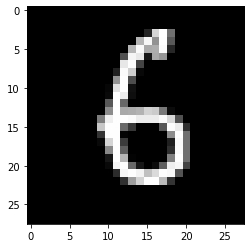

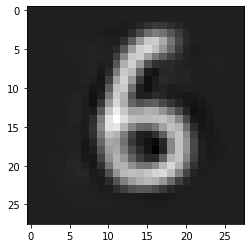

0.5705


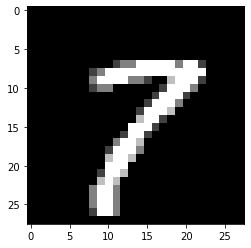

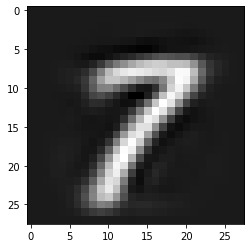

0.6255


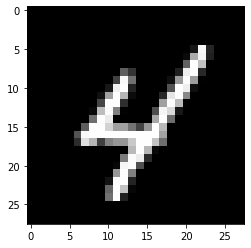

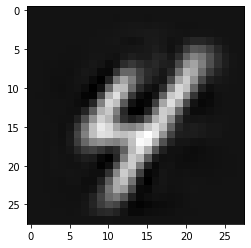

0.634


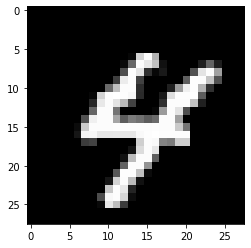

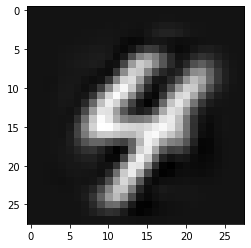

0.7865


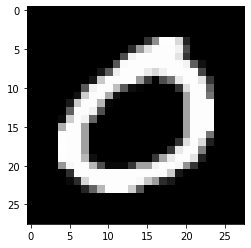

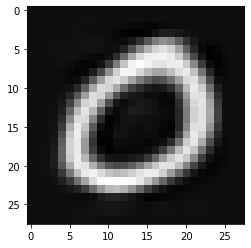

0.7035


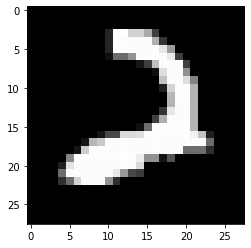

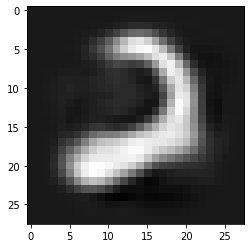

0.8175


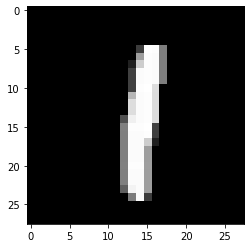

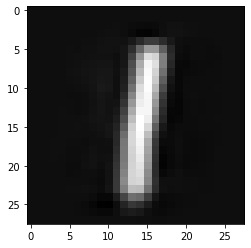

0.462


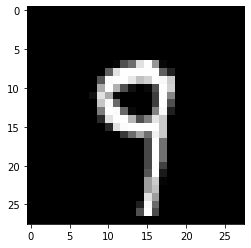

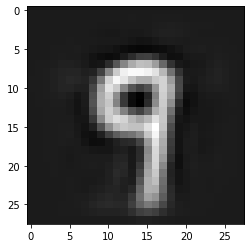

0.6


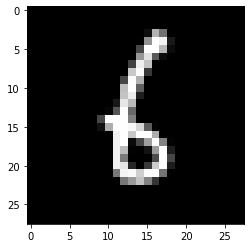

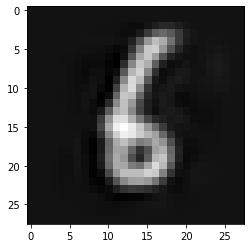

0.555


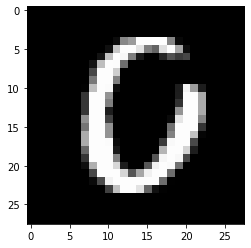

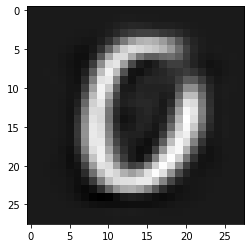

0.811


In [34]:
for i in range(10):
    plt.imshow(inputs[i].cpu().detach().numpy().reshape(28, 28), "gray")
    plt.show()
    plt.imshow(output[i].cpu().detach().numpy().reshape(28, 28), "gray")
    plt.show()
    print(np.count_nonzero(r[i].cpu().detach().numpy()) / r.shape[1])